In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

/home/thomas/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
cars_file = "https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv"
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

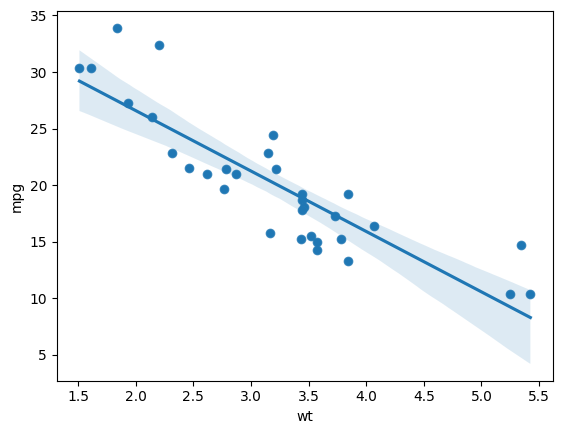

In [3]:
sns.scatterplot(x="wt", y="mpg", data=cars)
sns.regplot(x="wt", y="mpg", data=cars)

In [4]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1, 1)
X_np.shape
y_list = cars.mpg.values.tolist()

X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [16]:
w = torch.rand(1, requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

num_epochs = (
    1000  # once all the data completely fetched to the models, then it calls epoch
)
learning_rate = 0.001

for epoch in range(num_epochs):
    for i in range(len(X)):  # batch size = 1
        y_pred = X[i] * w + b  # forward pass
        # calculate loss
        loss_tensor = torch.pow(y_pred - y[i], 2)
        # print("loss tensor: ", loss_tensor, "loss tensor data: ", loss_tensor.data)
        # backward pass
        loss_tensor.backward()

        # extract losses
        loss_value = loss_tensor.data[0]

        # update weight and bias
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad

            # zero the gradients
            w.grad.zero_()
            b.grad.zero_()
        print("loss value", loss_value)

loss tensor:  tensor([378.0308], grad_fn=<PowBackward0>) loss tensor data:  tensor([378.0308])
loss value tensor(378.0308)
loss tensor:  tensor([360.5020], grad_fn=<PowBackward0>) loss tensor data:  tensor([360.5020])
loss value tensor(360.5020)
loss tensor:  tensor([433.5879], grad_fn=<PowBackward0>) loss tensor data:  tensor([433.5879])
loss value tensor(433.5879)
loss tensor:  tensor([340.2268], grad_fn=<PowBackward0>) loss tensor data:  tensor([340.2268])
loss value tensor(340.2268)
loss tensor:  tensor([228.6575], grad_fn=<PowBackward0>) loss tensor data:  tensor([228.6575])
loss value tensor(228.6575)
loss tensor:  tensor([199.1752], grad_fn=<PowBackward0>) loss tensor data:  tensor([199.1752])
loss value tensor(199.1752)
loss tensor:  tensor([96.5129], grad_fn=<PowBackward0>) loss tensor data:  tensor([96.5129])
loss value tensor(96.5129)
loss tensor:  tensor([404.1947], grad_fn=<PowBackward0>) loss tensor data:  tensor([404.1947])
loss value tensor(404.1947)
loss tensor:  tenso

KeyboardInterrupt: 

In [6]:
# make sure GraphViz is installed (https://graphviz.org/download/)
# if not computer restarted, append directly to PATH variable
# import os
# from torchviz import make_dot
# os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
# make_dot(loss_tensor)